Sem 3 Section L

**Student 1**
Name : Vineet Goel
SRN : PES1UG22CS697

**Student 2**
Name : Vishwathma Bhat
SRN : PES1UG22CS705

**Student 3**
Name : Dhruthan M N
SRN : PES2UG22CS181

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [29]:
df = pd.read_csv("titanic.csv")

**1st Question**

In [30]:
DT = df.dtypes

TYPE = {}
for A,B in DT.items():
    if B == 'int64':
        if A == 'Survived':TYPE[A] = 'nominal'
        else:
            if A.startswith('Sib') or A.startswith('Par'):TYPE[A] = 'ordinal'
            else:TYPE[A] = 'interval'
    elif B == 'object':
        if A in ['Sex', 'Embarked']:TYPE[A] = 'nominal'
        else:TYPE[A] = 'nominal'
    elif B == 'float64':TYPE[A] = 'ratio'
    else:raise ValueError(f"Unknown data type {B} for feature {A}")

print(TYPE)

{'PassengerId': 'interval', 'Survived': 'nominal', 'Pclass': 'interval', 'Name': 'nominal', 'Sex': 'nominal', 'Age': 'ratio', 'SibSp': 'ordinal', 'Parch': 'ordinal', 'Ticket': 'nominal', 'Fare': 'ratio', 'Cabin': 'nominal', 'Embarked': 'nominal'}


**2nd Question**

In [31]:
central_tendency = {}
standard_deviation = {}
data_range = {}


print("Central Tendency:\n\n")
for feature in df.columns:

    if pd.api.types.is_numeric_dtype(df[feature]):

        if feature == 'Survived':
            central_tendency[feature] = df[feature].mode().values[0]
            print(feature+": Mode- ",central_tendency[feature])

        else:
            central_tendency[feature] = df[feature].median()
            print(feature+": Median - ",central_tendency[feature])


        standard_deviation[feature] = df[feature].std()

    
        data_range[feature] = df[feature].max() - df[feature].min()

    else:
        central_tendency[feature] = df[feature].mode().values[0]
        print(feature+": Mode- ",central_tendency[feature])



print("\nStandard deviation:\n")
print(standard_deviation)

print("\nRange:\n")
print(data_range)


Central Tendency:


PassengerId: Median -  446.0
Survived: Mode-  0
Pclass: Median -  3.0
Name: Mode-  Abbing, Mr. Anthony
Sex: Mode-  male
Age: Median -  28.0
SibSp: Median -  0.0
Parch: Median -  0.0
Ticket: Mode-  1601
Fare: Median -  14.4542
Cabin: Mode-  B96 B98
Embarked: Mode-  S

Standard deviation:

{'PassengerId': 257.3538420152301, 'Survived': 0.4865924542648585, 'Pclass': 0.8360712409770513, 'Age': 14.526497332334044, 'SibSp': 1.1027434322934275, 'Parch': 0.8060572211299559, 'Fare': 49.693428597180905}

Range:

{'PassengerId': 890, 'Survived': 1, 'Pclass': 2, 'Age': 79.58, 'SibSp': 8, 'Parch': 6, 'Fare': 512.3292}


**3rd Question**

In [32]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

df['Age'].fillna(int(df['Age'].mean()), inplace=True)

df['Embarked'].fillna(str(df['Embarked'].mode()), inplace=True)

duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

print("Cabin values we cant fill any value we could drop those rows")
df.isnull().sum()



Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Number of duplicate rows: 0
Cabin values we cant fill any value we could drop those rows


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**4th Question**

In [33]:
sns.histplot(x='Age',data=df).set(title='Ages Histplot')

[Text(0.5, 1.0, 'Ages Histplot')]

[Text(0.5, 1.0, 'Fare Histplot')]

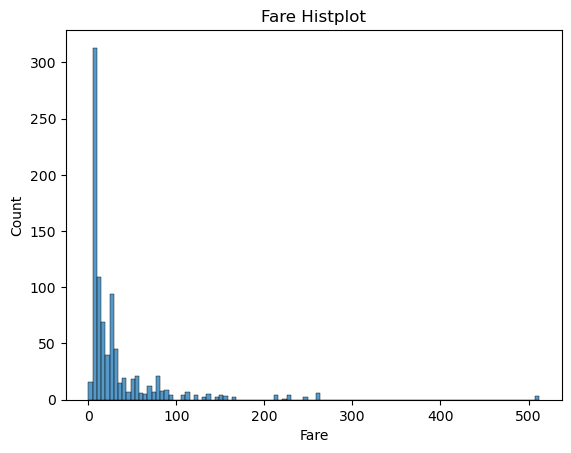

In [34]:
sns.histplot(x='Fare',data=df).set(title='Fare Histplot')

In [35]:
sns.boxplot(x=df['Age']).set(title='Ages Boxplot')

[Text(0.5, 1.0, 'Ages Boxplot')]

[Text(0.5, 1.0, 'Fares Boxplot')]

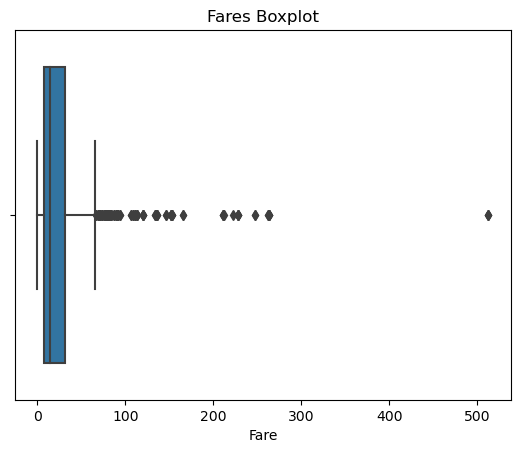

In [36]:
sns.boxplot(x=df['Fare']).set(title='Fares Boxplot')

We consider data points as outliers if they are less than (1st_Quartile-1.5(Inter_Quartile_Range)) or more than (3rd_Quartile+1.5(Inter_Quartile_Range))

**5th Question**

In [37]:
df1 = df.dropna()
q1,q3 = np.percentile(df1['Age'], [25,75])

iqr = q3-q1

lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)


In [38]:
df1 = df1[(df1['Age']>=lower_bound)&(df['Age']<=upper_bound)]
sns.boxplot(x=df1['Age']).set(title='Ages Boxplot')



C:\Users\ASUS\AppData\Local\Temp\ipykernel_22988\1641092331.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df1['Age']>=lower_bound)&(df['Age']<=upper_bound)]


[Text(0.5, 1.0, 'Ages Boxplot')]

In [39]:
df2 = df.dropna()
q1,q3 = np.percentile(df1['Fare'], [25,75])

iqr = q3-q1

lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)

[Text(0.5, 1.0, 'Fares outliers removed Boxplot')]

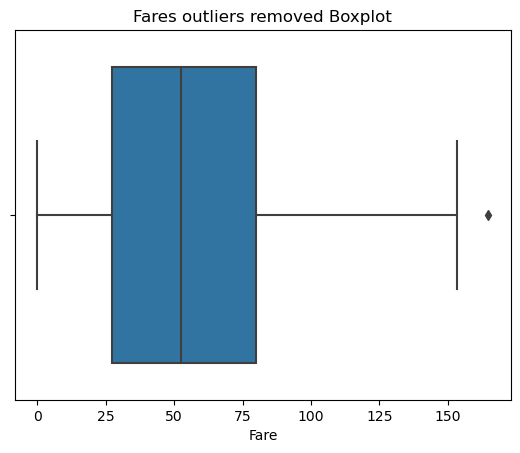

In [40]:
df1 = df1[(df1['Fare']>=lower_bound)&(df1['Fare']<=upper_bound)]
sns.boxplot(x=df1['Fare']).set(title='Fares outliers removed Boxplot')



**6th Question**

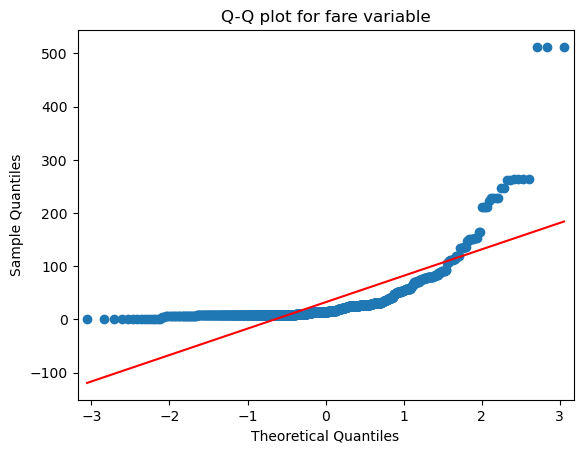

In [41]:
sm.qqplot(df['Fare'],line='s')
plt.title('Q-Q plot for fare variable')
plt.show()


**7th Question**

In [42]:
# Load the Titanic dataset (assuming the dataset is in a CSV file named 'titanic.csv')
titanic_data = pd.read_csv('titanic.csv')

# Select the numerical columns you want to calculate correlations with 'Age'
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Calculate the correlation matrix
correlation_matrix = titanic_data[numerical_columns].corr()

# Set a correlation threshold (e.g., 0.3 for demonstration)
correlation_threshold = 0.3

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True, vmin=-1, vmax=1)
plt.title(f'Correlation Heatmap (Threshold: {correlation_threshold})')
plt.show()

Threshold is 0.3

**8th Question**

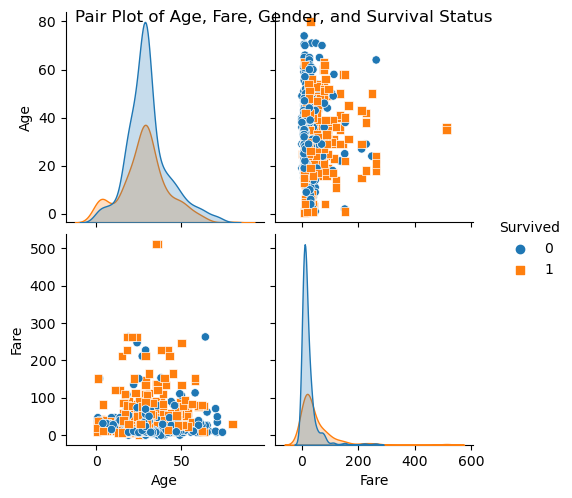

In [43]:
selected_variables = ['Age', 'Fare', 'Sex', 'Survived']
pairplot = sns.pairplot(df[selected_variables], hue='Survived', markers=["o", "s"])
pairplot.fig.suptitle('Pair Plot of Age, Fare, Gender, and Survival Status')
plt.show()

**9th Question**

In [44]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

alpha = 0.05
t_stat, p_value = stats.ttest_ind(survived['Fare'], not_survived['Fare'], equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)


if p_value < alpha:
    print("Reject the null hypothesis: Fare has a significant impact on survival chances.")
else:
    print("Fail to reject the null hypothesis: Fare does not have a significant impact on survival chances.")

plt.figure(figsize=(10, 6))
plt.hist(survived['Fare'], bins=30, alpha=0.5, label='Survived', color='blue')
plt.hist(not_survived['Fare'], bins=30, alpha=0.5, label='Not Survived', color='red')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Fare by Survival Status')
plt.show()

T-statistic: 6.839099259085254
P-value: 2.6993323503141236e-11
Reject the null hypothesis: Fare has a significant impact on survival chances.


**10th question**

In [47]:
sf = df[df['Survived'] == 1]['Fare']
ns = df[df['Survived'] == 0]['Fare']

sc = np.var(sf, ddof=1)
nsc = np.var(ns, ddof=1)

t_statistic, p_value = stats.ttest_ind(sf, ns, equal_var=False)
dof = df['Fare'].count() - 2
alpha = 0.05
tv = abs(t_statistic)
MOE = tv * np.sqrt((sc + nsc)/2)/(dof)**(0.5)

print('Margin of error:', MOE)


Margin of error: 11.941197527035811
